In [9]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [10]:
titanic_1 = sns.load_dataset('titanic')

In [11]:
# % de nulos de age
print(titanic_1['age'].isnull().sum() / len(titanic_1['age']))

0.19865319865319866


In [31]:
len(titanic_1['age'])

891

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<Axes: xlabel='age', ylabel='Count'>

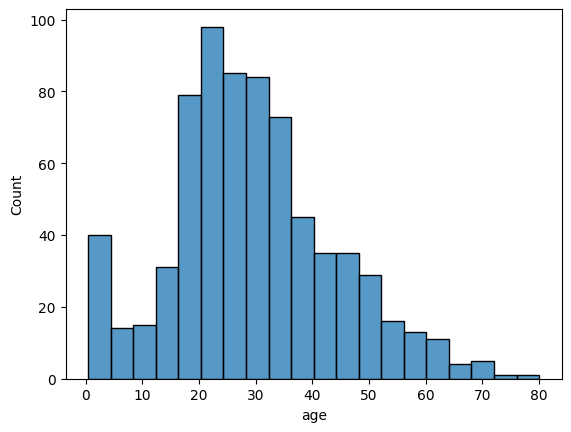

In [12]:
#Miramos la distr de age
sns.histplot(titanic_1['age'])

Object `media` not found.
Podemos ver como la distribución de age se ve afectada por la imputación de la media


C:\Users\demst\AppData\Local\Temp\ipykernel_20540\3160186009.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_1['age'].fillna(titanic_1['age'].mean(), inplace=True)


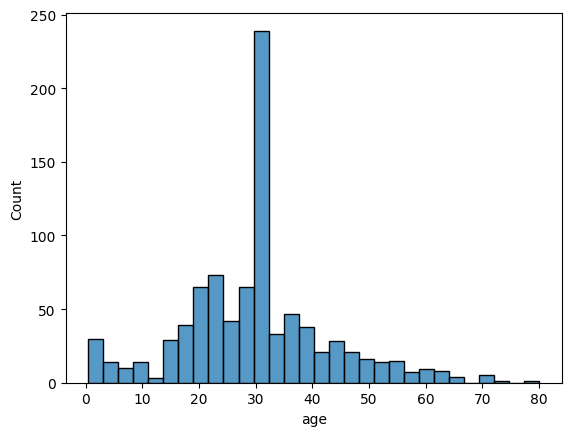

In [13]:
Que pasa si reparamos los nulos con la media?

titanic_1['age'].fillna(titanic_1['age'].mean(), inplace=True)
sns.histplot(titanic_1['age'])
print("Podemos ver como la distribución de age se ve afectada por la imputación de la media")

### Solución, reparar los valores nulos usando knn

##### KNN actua mejor que la media para imputar valores nulos ya que toma en cuenta las variables que tienen relación con la variable a imputar, en este caso age al tener un 20% de nulos, es afectado al usar las tecnicas mas simples como la moda, media o mediana.

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

<Axes: >

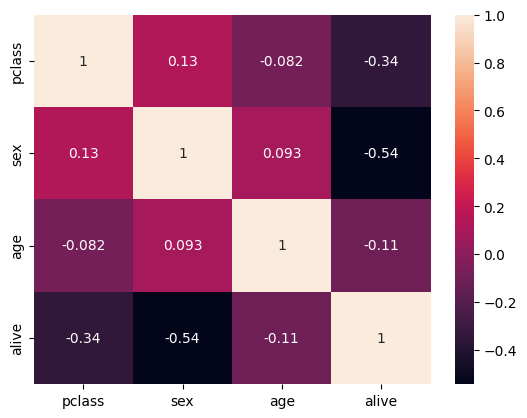

In [28]:
encoder = LabelEncoder()
df_encoder = df.copy()
df_encoder = df_encoder.apply(encoder.fit_transform)
df_encoder =  df_encoder[['pclass', 'sex', 'age',  'alive']]
sns.heatmap(df_encoder.corr(), annot=True)

Paso 1: Estado inicial de los datos
Total de registros: 891
Valores nulos en age: 177

Estadísticas iniciales:
              age        fare      pclass         sex
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118   32.204208    2.308642    0.647587
std     14.526497   49.693429    0.836071    0.477990
min      0.420000    0.000000    1.000000    0.000000
25%     20.125000    7.910400    2.000000    0.000000
50%     28.000000   14.454200    3.000000    1.000000
75%     38.000000   31.000000    3.000000    1.000000
max     80.000000  512.329200    3.000000    1.000000


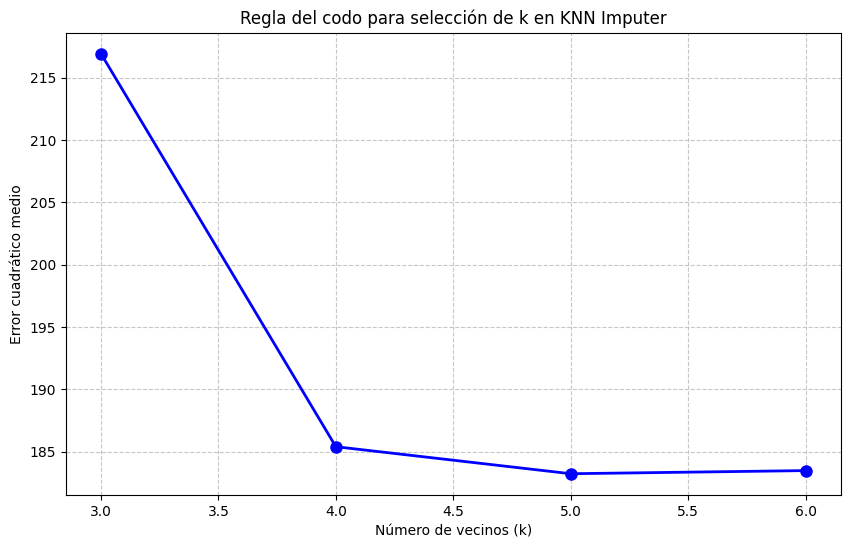


Número óptimo de vecinos (k) encontrado: 4

Estadísticas después de la imputación:
count    891.000000
mean      29.724357
std       12.643185
min        0.420000
25%       22.000000
50%       28.500000
75%       36.583750
max       80.000000
Name: age, dtype: float64

Estadísticas originales (sin nulos):
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


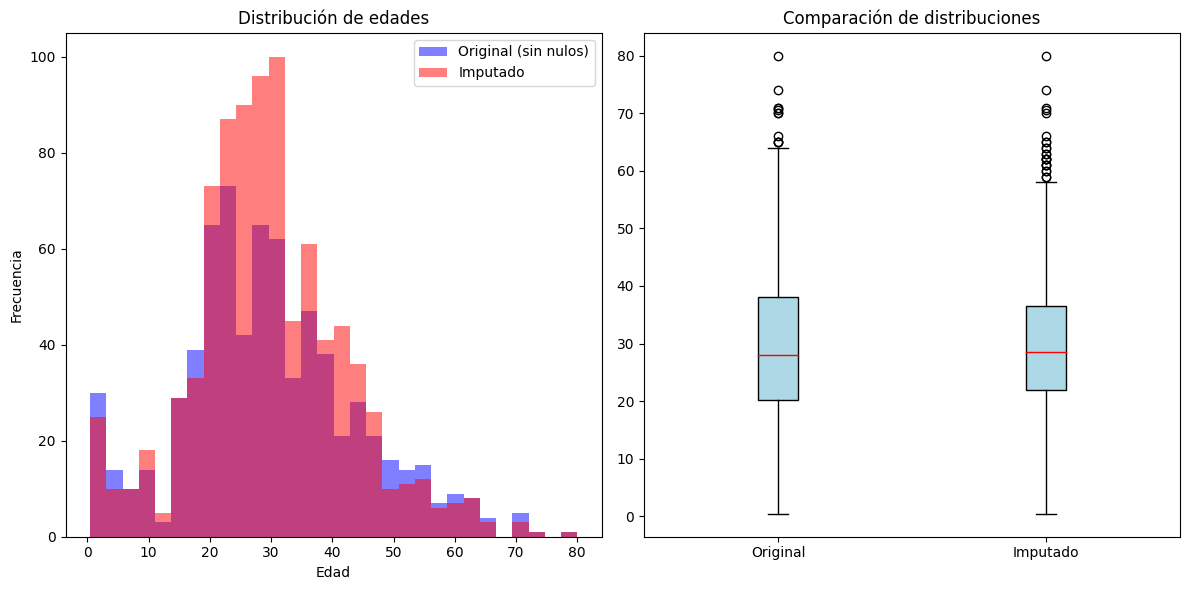


Métricas de calidad de la imputación:
MSE final: 185.40
RMSE final: 13.62


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Paso 1: Cargar y preparar los datos
# Propósito: Cargar el dataset y preparar las variables para el análisis
df = sns.load_dataset('titanic')
numeric_features = ['age', 'fare', 'pclass', 'sex'] # Seleccionar variables que queremos usar para establecer grupos
df_numeric = df[numeric_features].copy()

# Codificar la variable categórica 'sex' usando LabelEncoder
# Propósito: Convertir datos categóricos a numéricos para que KNN pueda procesarlos
le = LabelEncoder()
df_numeric['sex'] = le.fit_transform(df_numeric['sex'])

# Mostrar estado inicial de los datos
print("Paso 1: Estado inicial de los datos")
print(f"Total de registros: {len(df_numeric)}")
print(f"Valores nulos en age: {df_numeric['age'].isnull().sum()}")
print("\nEstadísticas iniciales:")
print(df_numeric.describe())

# Paso 2: Crear conjunto de validación
# Propósito: Separar datos para poder evaluar la calidad de la imputación
np.random.seed(42)  # Para reproducibilidad
# Seleccionar 20% de los datos con edad conocida para validación
test_mask = df_numeric['age'].notna() & (np.random.rand(len(df_numeric)) < 0.2)
validation_age = df_numeric.loc[test_mask, 'age'].copy()
df_numeric.loc[test_mask, 'age'] = np.nan

# Paso 3: Calcular error para diferentes valores de k
# Propósito: Encontrar el número óptimo de vecinos para KNN
k_values = range(3, 7)  # Probar valores de k entre 3 y 6
mse_values = []

for k in k_values:
    # Aplicar KNN Imputer para cada valor de k
    imputer = KNNImputer(n_neighbors=k)
    data_imputed = imputer.fit_transform(df_numeric)
    
    # Calcular el error medio cuadrático para evaluar la calidad
    mse = mean_squared_error(
        validation_age,
        pd.DataFrame(data_imputed, columns=numeric_features).loc[test_mask, 'age']
    )
    mse_values.append(mse)

# Paso 4: Visualizar la curva del codo
# Propósito: Visualizar gráficamente el punto óptimo de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Error cuadrático medio')
plt.title('Regla del codo para selección de k en KNN Imputer')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Paso 5: Encontrar el punto de codo
# Propósito: Determinar automáticamente el mejor valor de k
def find_elbow(x, y):
    """
    Encuentra el punto de codo usando el método de la máxima curvatura
    """
    # Calcular primera derivada
    dy = np.diff(y, 1)
    dx = np.diff(x, 1)
    dy_dx = dy/dx
    
    # Calcular segunda derivada
    d2y_dx2 = np.diff(dy_dx, 1)
    
    # Encontrar punto de máxima curvatura
    elbow_idx = np.argmax(np.abs(d2y_dx2)) + 1
    return x[elbow_idx]

optimal_k = find_elbow(np.array(list(k_values)), np.array(mse_values))
print(f"\nNúmero óptimo de vecinos (k) encontrado: {optimal_k}")

# Paso 6: Aplicar KNN con k óptimo
# Propósito: Realizar la imputación final con el mejor k
final_imputer = KNNImputer(n_neighbors=int(optimal_k))
data_final = final_imputer.fit_transform(df_numeric)
df_final = pd.DataFrame(data_final, columns=numeric_features)

# Paso 7: Mostrar resultados y comparaciones
# Propósito: Comparar estadísticas antes y después de la imputación
print("\nEstadísticas después de la imputación:")
print(df_final['age'].describe())
print("\nEstadísticas originales (sin nulos):")
print(df['age'].dropna().describe())

# Paso 8: Visualizar distribuciones
# Propósito: Comparar visualmente las distribuciones original e imputada
plt.figure(figsize=(12, 6))

# Histograma comparativo
plt.subplot(1, 2, 1)
plt.hist(df['age'].dropna(), bins=30, alpha=0.5, label='Original (sin nulos)', color='blue')
plt.hist(df_final['age'], bins=30, alpha=0.5, label='Imputado', color='red')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de edades')
plt.legend()

# Diagrama de cajas
plt.subplot(1, 2, 2)
plt.boxplot([df['age'].dropna(), df_final['age']], 
            labels=['Original', 'Imputado'],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red'))
plt.title('Comparación de distribuciones')

plt.tight_layout()
plt.show()

# Paso 9: Calcular métricas de calidad
# Propósito: Evaluar cuantitativamente la calidad de la imputación
print("\nMétricas de calidad de la imputación:")
print(f"MSE final: {mse_values[int(optimal_k)-3]:.2f}")  # Ajustado por el rango de k
print(f"RMSE final: {np.sqrt(mse_values[int(optimal_k)-3]):.2f}")

# Decodificar la variable 'sex' de vuelta a su forma original
df_final['sex'] = le.inverse_transform(df_final['sex'].astype(int))

In [32]:
df_final

,age,fare,pclass,sex
0,22.00,7.2500,3.0,male
1,38.00,71.2833,1.0,female
2,26.00,7.9250,3.0,female
3,35.00,53.1000,1.0,female
4,26.25,8.0500,3.0,male
...,...,...,...,...
886,27.00,13.0000,2.0,male
887,19.00,30.0000,1.0,female
888,28.00,23.4500,3.0,female
889,26.00,30.0000,1.0,male
